In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Define Quadratic loss function

In [ ]:
def quadratic_loss(x,y):
  return x**2 +10*y**2

Gradient of the loss function

In [ ]:
def quadratic_grad(x,y):
  dx = 2*x
  dy = 20*y
  return np.array([dx,dy])


vanilla gradient descent

In [ ]:
def vanilla_grad(grad_func,lr,epoches,start_point):
  x,y = start_point
  path = [(x,y)]
  losses = [quadratic_loss(x,y)]

  for _ in range(epoches):
    grad = grad_func(x,y)
    x -= lr*grad[0]
    y -= lr*grad[1]
    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path),losses

RMS_prop

In [ ]:
def rms_prop(grad_func,lr,beta,epsilon,epoches,start_point):
  x,y = start_point
  Eg2 = np.array([0.0,0.0])

  path = [(x,y)]
  losses = [quadratic_loss(x,y)]

  for _ in range(epoches):
    grad = grad_func(x,y)
    Eg2 = beta*Eg2 + (1-beta)*grad**2
    x -= lr*grad[0]/(np.sqrt(Eg2[0])+epsilon)
    y -= lr*grad[1]/(np.sqrt(Eg2[1])+epsilon)
    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path),losses

Visualization of paths

In [ ]:
def plot_paths(functions, path, labels, title):
  X,Y = np.meshgrid(np.linspace(-2,2,400),np.linspace(-2,2,400))
  # Changed 'function' to 'functions' to use the passed function for calculation.
  Z = functions(X,Y)

  plt.figure(figsize=(8,6))
  plt.contour(X,Y,Z,levels=50,cmap = 'jet')

  for path,label in zip(path,labels):
    # Convert the path to a NumPy array before slicing
    path_array = np.array(path)
    plt.plot(path_array[:,0],path_array[:,1],label = label)
    plt.scatter(path_array[0,0],path_array[0,1],color='green',label = 'start')
    plt.scatter(path_array[-1,0],path_array[-1,1],color='red',label = 'end')

  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()

Visualization of losses

In [ ]:
def plot_losses(losses, labels, title):
  plt.figure(figsize=(8,6))

  for loss, label in zip(losses, labels):
    plt.plot(loss, label=label)

  plt.title(title)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

Parameters

In [ ]:
lr_gd = 0.01
lr_rmsprop = 0.01
beta = 0.9
epsilon = 1e-8
epoches = 180
start_point = (1.5,1.5)

Run optimization

In [ ]:
path_gd,losses_gd = vanilla_grad(quadratic_grad,lr_gd,epoches,start_point)
path_rmsprop,losses_rmsprop = rms_prop(quadratic_grad,lr_rmsprop,beta,epsilon,epoches,start_point)

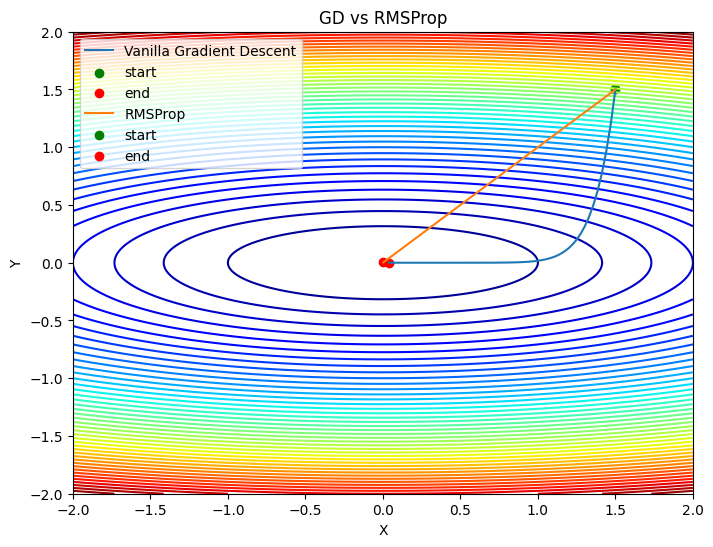

In [ ]:
plot_paths(quadratic_loss, [path_gd, path_rmsprop], ['Vanilla Gradient Descent', 'RMSProp'], 'GD vs RMSProp')

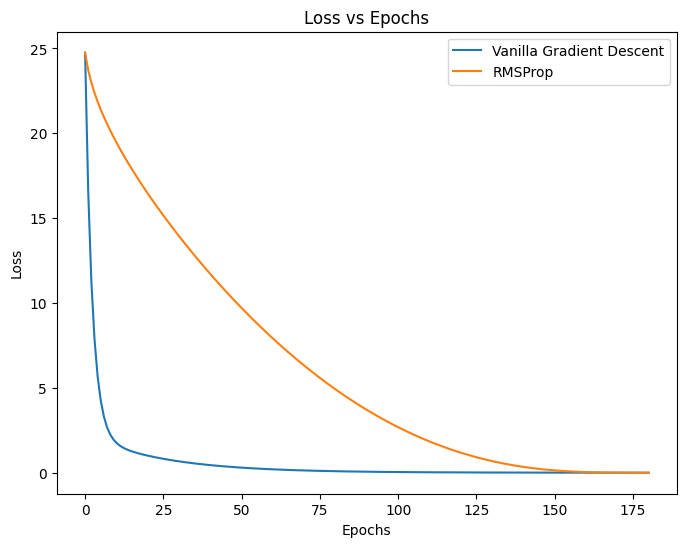

In [ ]:
plot_losses([losses_gd, losses_rmsprop], ['Vanilla Gradient Descent', 'RMSProp'], 'Loss vs Epochs')